In [156]:
# import sys
# sys.path.append("../utils")
from utils.generate_field import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fft2, ifft2
import math
from matplotlib import cm, colors
import imageio
import os
result_dir = '/home/zyou6474/tasks/channel_flow_small'
nk = 1

In [157]:
# dims = [128, 128, 64]
dims = [16, 16, 16]
fdims = dims*1
fdims[0] += 2
nproc=4
domain = [2*np.pi, np.pi, 1]
x_coords, y_coords, z_coords = xyz(domain, dims)
dx = x_coords[1]- x_coords[0]
# Z-index of where the source is located at
z_ind = np.argmin(abs(z_coords-0.5))
print(z_ind)

ld = np.linspace(0, domain[0]+2*dx, fdims[0])
fk_x = np.arange(fdims[0])*2*np.pi/domain[0]
fk_y = np.arange(fdims[1])*2*np.pi/domain[1]

half_kx_ind = math.floor(dims[0]/2)+1
half_kx = fk_x[:half_kx_ind]
half_ky_ind = math.floor(dims[1]/2) + 1 - 1

10


In [158]:
# recent result
recent_dir = result_dir + r'/outputs'

dir = recent_dir
t_ind = 10
t_total = 5000
timestep = np.linspace(0, t_total, 51)


In [159]:
# filename of different varaibles
theta_f = dir + r'/theta.%.2i.%.8i'
velocity_f = dir + r'/baseflow/u_base.%.8i'

u = read_array_from_file(velocity_f %  t_ind, dims)
theta_o = read_array_from_file(theta_f % (nk, int(t_ind-1)), dims)
x_ind = np.argmax(theta_o[:, half_ky_ind, z_ind])
print(x_ind)
theta = read_array_from_file(theta_f % (nk, t_ind), dims)

# Spectrum of RHS
fdims[2] = int((fdims[2]/nproc+2)*nproc)

RHS_hat_f = dir + '/RHS_col.%.2i.%.8i'
RHS_hat = read_array_from_file(RHS_hat_f % (nk, int(t_ind)), fdims)

theta_hat_f = dir + '/theta_hat.%.2i.%.8i'
theta_hat = read_array_from_file(theta_hat_f % (nk, int(t_ind)), fdims)

3


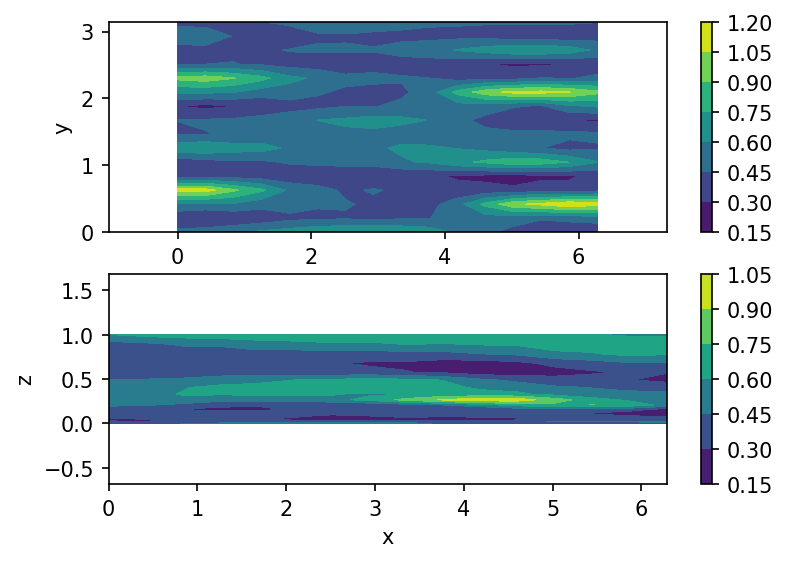

In [160]:
fig, ax = plt.subplots(2, 1, figsize=(6,4), dpi=150)
cs = ax[0].contourf(x_coords, y_coords, u[:, :, z_ind].T)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].axis('equal')

ax[0].set_ylim(bottom=0)

cbar = fig.colorbar(cs)


cs1 = ax[1].contourf(x_coords, z_coords, u[:, half_ky_ind, :].T)
ax[1].set_xlabel('x')
ax[1].set_ylabel('z')
ax[1].axis('equal')

ax[1].set_ylim(bottom=0)

cbar = fig.colorbar(cs1)
fig.show()

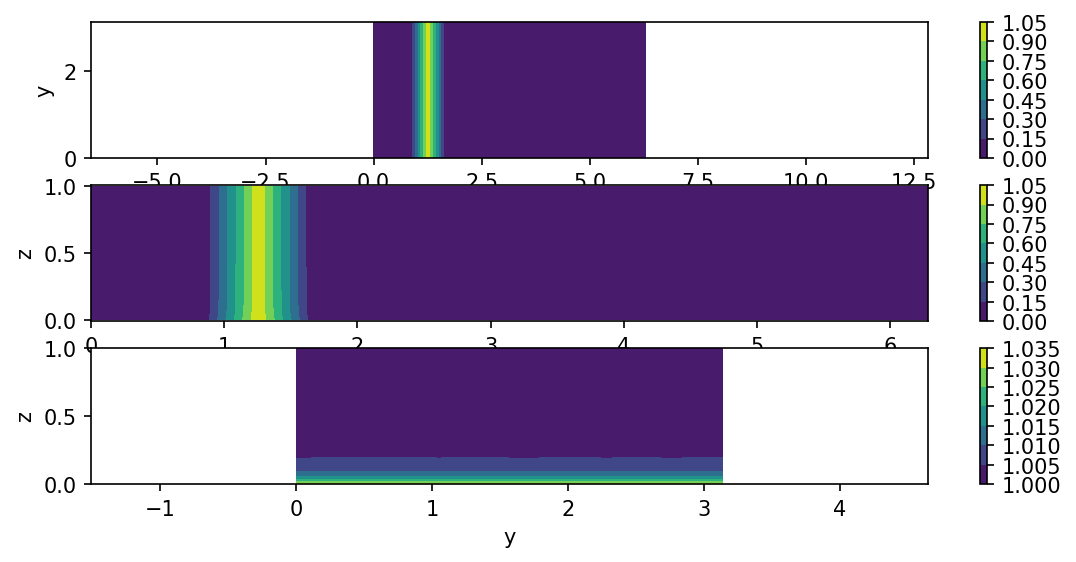

In [161]:
fig, ax = plt.subplots(3, 1, figsize=(9,4), dpi=150)
cs = ax[0].contourf(x_coords, y_coords, theta_o[:, :, z_ind].T)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].axis('equal')
ax[0].set_ylim(bottom=0)
cbar = fig.colorbar(cs)


cs1 = ax[1].contourf(x_coords, z_coords, theta_o[:, half_ky_ind, :].T)
ax[1].set_xlabel('x')
ax[1].set_ylabel('z')
ax[1].axis('equal')
ax[1].set_ylim(bottom=0)
cbar = fig.colorbar(cs1)

cs2 = ax[2].contourf(y_coords, z_coords, theta_o[x_ind, :, :].T)
ax[2].set_xlabel('y')
ax[2].set_ylabel('z')
ax[2].axis('equal')
ax[2].set_ylim(bottom=0)
cbar = fig.colorbar(cs2)


fig.show()

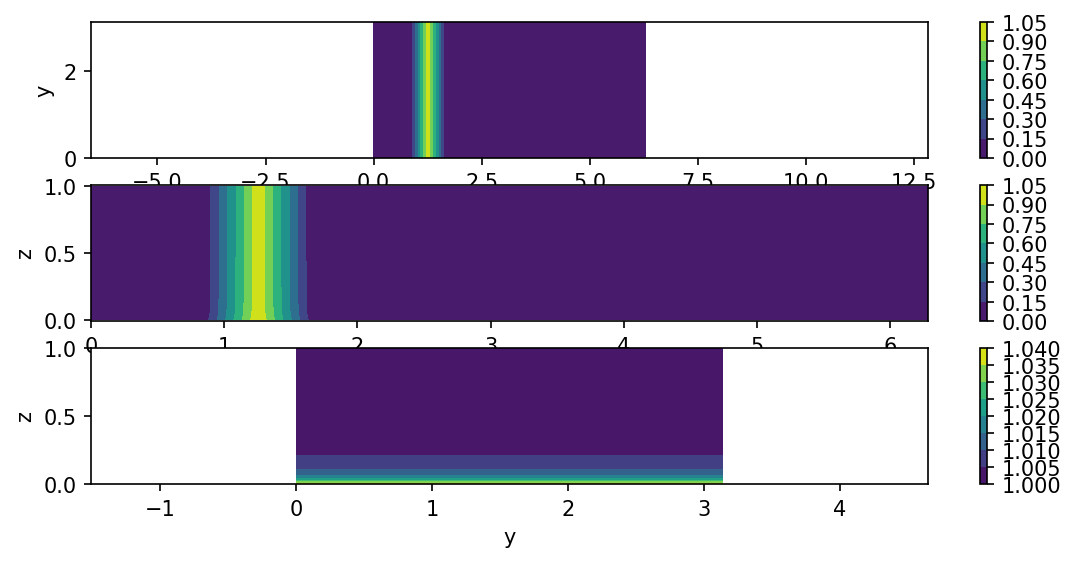

In [162]:
fig, ax = plt.subplots(3, 1, figsize=(9,4), dpi=150)
cs = ax[0].contourf(x_coords, y_coords, theta[:, :, z_ind].T)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].axis('equal')
ax[0].set_ylim(bottom=0)
cbar = fig.colorbar(cs)


cs1 = ax[1].contourf(x_coords, z_coords, theta[:, half_ky_ind, :].T)
ax[1].set_xlabel('x')
ax[1].set_ylabel('z')
ax[1].axis('equal')
ax[1].set_ylim(bottom=0)
cbar = fig.colorbar(cs1)

cs2 = ax[2].contourf(y_coords, z_coords, theta[x_ind, :, :].T)
ax[2].set_xlabel('y')
ax[2].set_ylabel('z')
ax[2].axis('equal')
ax[2].set_ylim(bottom=0)
cbar = fig.colorbar(cs2)


fig.show()

Text(0.5, 1.0, 'Fourier Space')

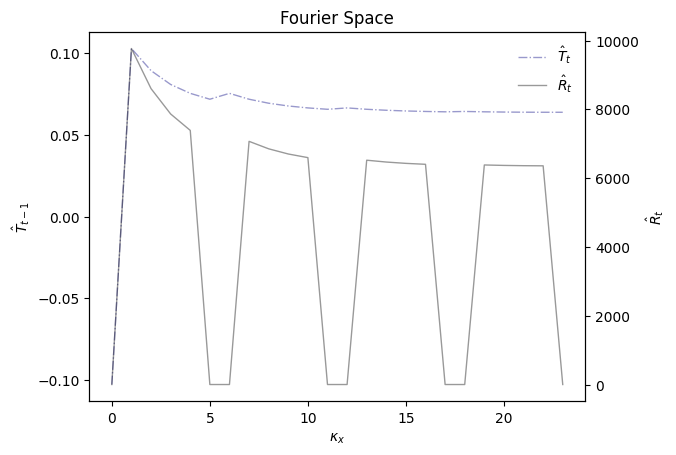

In [163]:
fig, ax = plt.subplots()
ax1 = ax.twinx()
lns21 = ax.plot(theta_hat[0, 0, :], label='$\hat{T}_{t}$', linestyle='-.', color='navy', alpha=0.4, linewidth=1)
lns22 = ax1.plot(RHS_hat[0, 0, :], label='$\hat{R}_{t}$', color='black', alpha=0.4, linewidth=1)

ax.set_xlabel('$\kappa_{x}$')
ax.set_ylabel('$\hat{T}_{t-1}$')
ax1.set_ylabel('$\hat{R}_{t}$')

# added these three lines
lns2 = lns21+lns22
labs2 = [l.get_label() for l in lns2]
ax.legend(lns2, labs2, loc=0, frameon=False)
ax.set_title('Fourier Space')

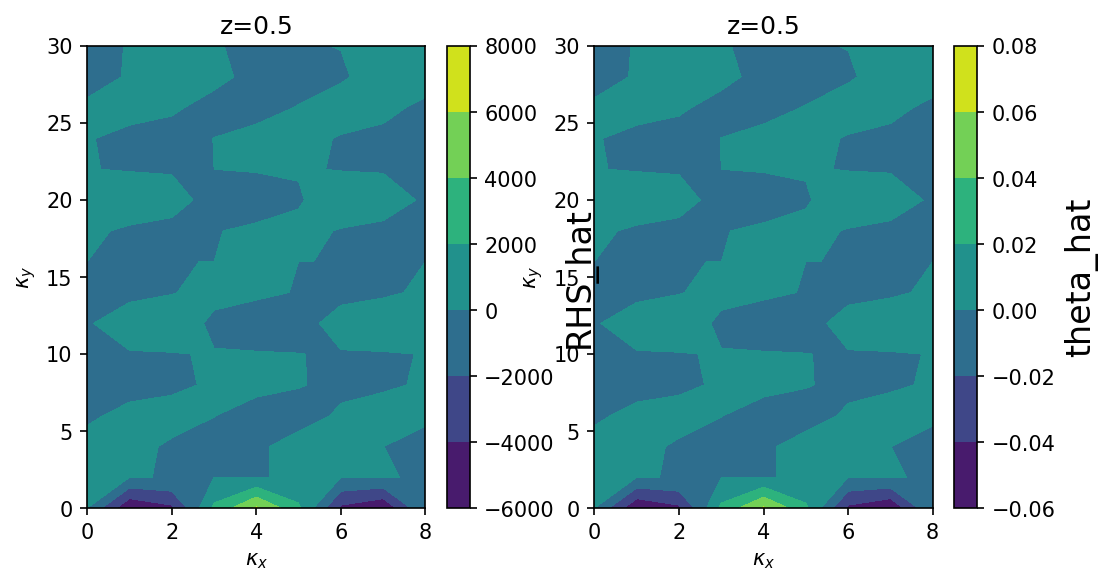

In [164]:
fig, axes = plt.subplots(1, 2, figsize=(8,4), dpi=150)
cs = axes[0].contourf( half_kx, fk_y, RHS_hat[1::2, :, z_ind].T)
axes[0].set_xlabel('$\kappa_x$')
axes[0].set_ylabel('$\kappa_y$')
# axes[0].axis('equal')
axes[0].set_title('z=0.5')

cbar = fig.colorbar(cs)
cbar.set_label(r'RHS_hat', size=16)


cs1 = axes[1].contourf( half_kx, fk_y, theta_hat[1::2, :, z_ind].T)
axes[1].set_xlabel('$\kappa_x$')
axes[1].set_ylabel('$\kappa_y$')
# axes[0].axis('equal')
axes[1].set_title('z=0.5')

cbar = fig.colorbar(cs1)
cbar.set_label(r'theta_hat', size=16)


fig.show()

Text(0.5, 1.0, 'Imaginary part of theta_hat')

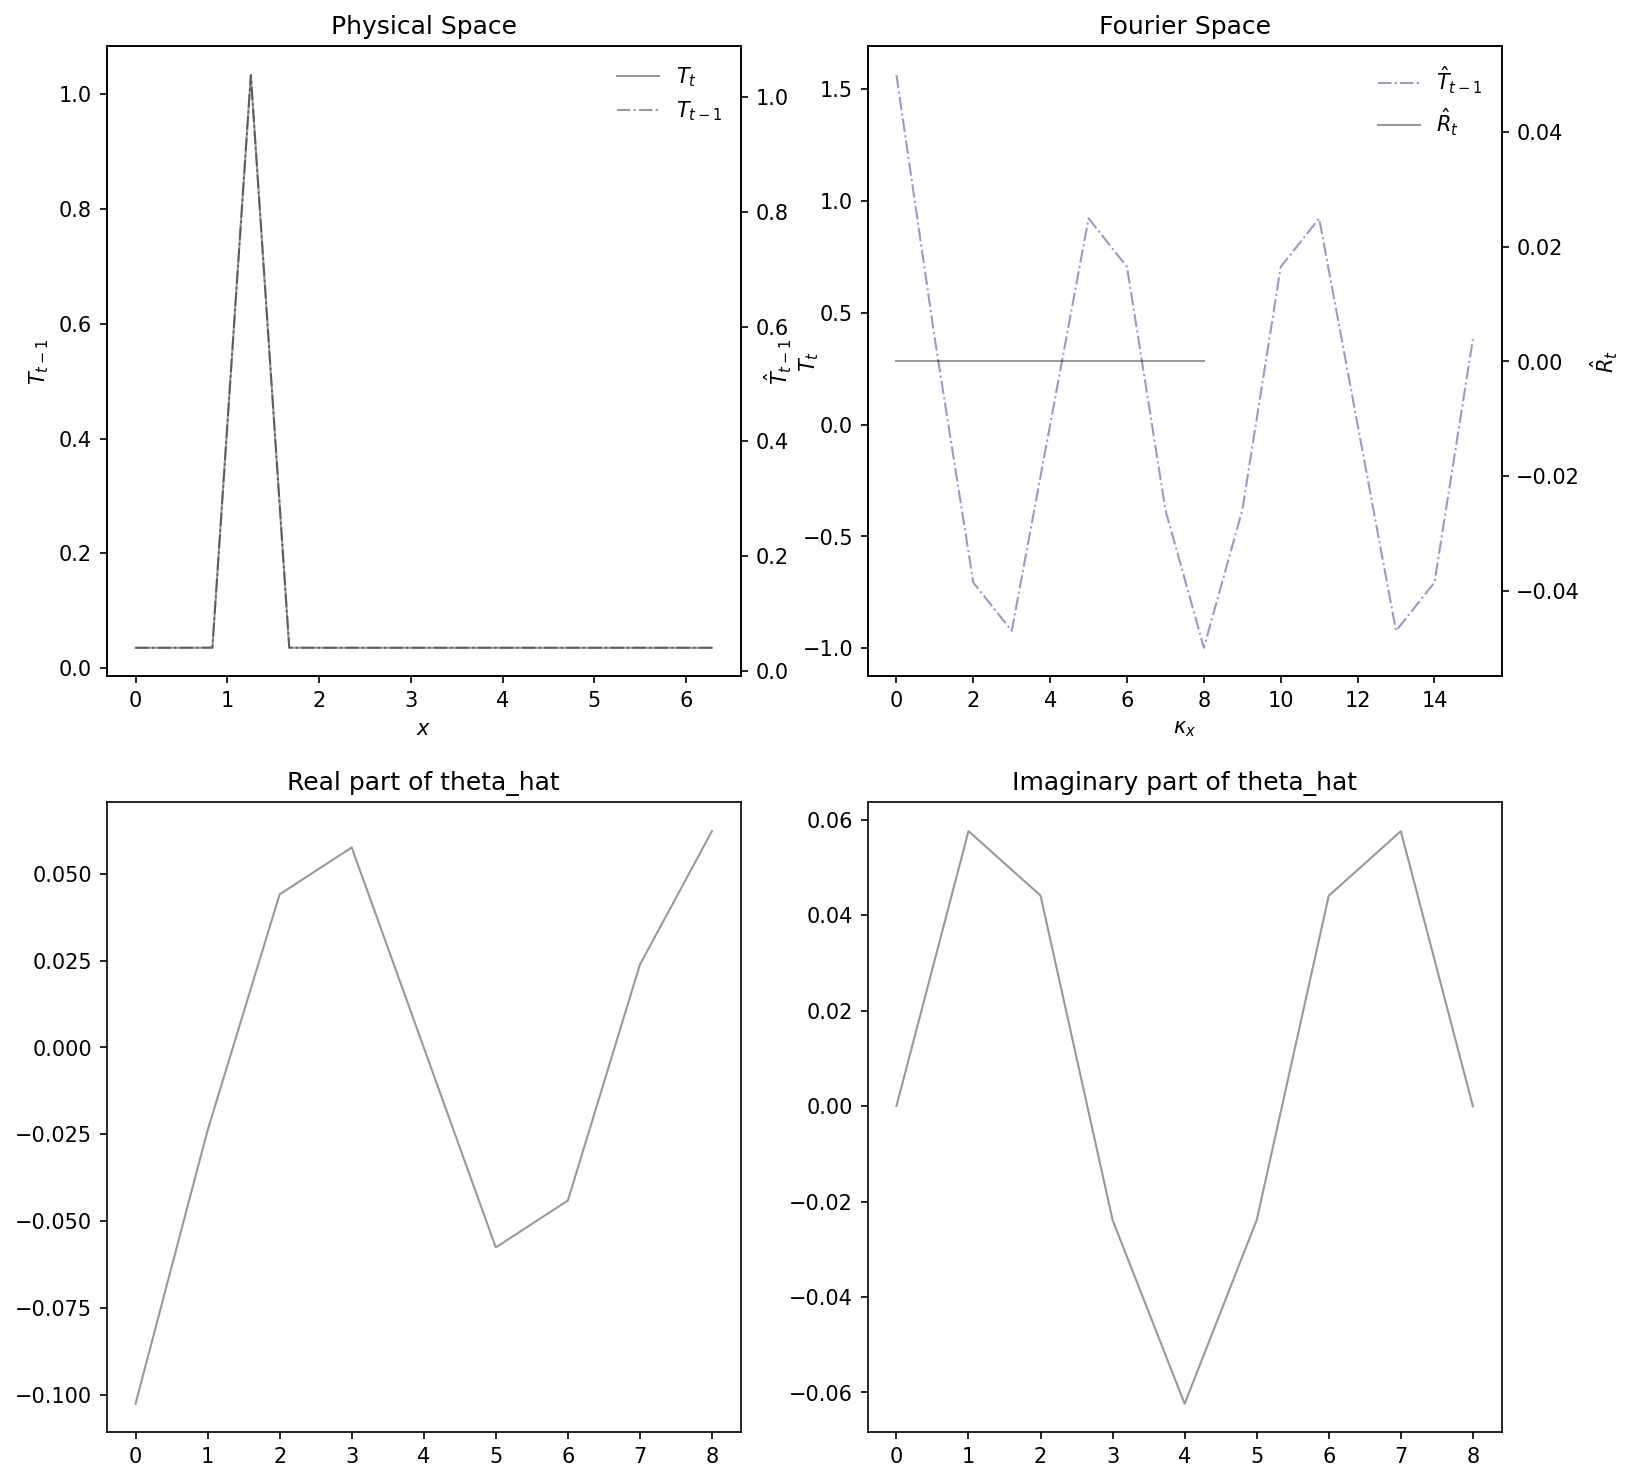

In [165]:
y_ind = 0
z_ind = 0

## First plot comparing the result at (half_ky_ind, z_ind) on t=t_ind and t=t_ind-1.
theta_o_hat = fft(theta_o[:, y_ind, z_ind])

fig, axes = plt.subplots(2, 2, figsize=(12, 12), dpi=150)
axes = axes.flatten()
ax0 = axes[0].twinx()
lns12 = axes[0].plot(x_coords, theta_o[:, y_ind, z_ind], label='$T_{t-1}$', linestyle='-.', color='black', alpha=0.4, linewidth=1)
lns11 = ax0.plot(x_coords, theta[:, y_ind, z_ind], label='$T_{t}$', color='black', alpha=0.4, linewidth=1)
axes[0].set_xlabel('$x$')
axes[0].set_ylabel('$T_{t-1}$')
ax0.set_ylabel('$T_{t}$')

lns1 = lns11+lns12
labs1 = [l.get_label() for l in lns1]
axes[0].legend(lns1, labs1, loc=0, frameon=False)
axes[0].set_title('Physical Space')


# Second plot
ax1 = axes[1].twinx()
lns21 = axes[1].plot(fk_x[:-2], theta_o_hat, label='$\hat{T}_{t-1}$', linestyle='-.', color='navy', alpha=0.4, linewidth=1)
lns22 = ax1.plot(half_kx, RHS_hat[::2, y_ind, z_ind], label='$\hat{R}_{t}$', color='black', alpha=0.4, linewidth=1)

axes[1].set_xlabel('$\kappa_{x}$')
axes[1].set_ylabel('$\hat{T}_{t-1}$')
ax1.set_ylabel('$\hat{R}_{t}$')

# added these three lines
lns2 = lns21+lns22
labs2 = [l.get_label() for l in lns2]
axes[1].legend(lns2, labs2, loc=0, frameon=False)
axes[1].set_title('Fourier Space')



axes[2].plot(half_kx, theta_hat[::2, y_ind, z_ind], color='black', alpha=0.4, linewidth=1)
axes[2].set_title(r'Real part of theta_hat')

axes[3].plot(half_kx, theta_hat[1::2, y_ind, z_ind], color='black', alpha=0.4, linewidth=1)
axes[3].set_title(r'Imaginary part of theta_hat')

## Check LBC

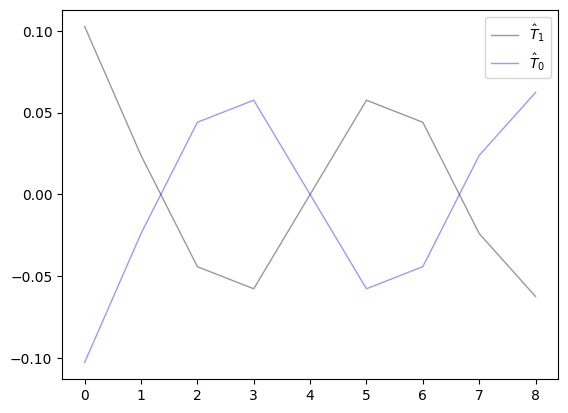

In [166]:
y_ind = 0
plt.plot(half_kx, theta_hat[::2, y_ind, 1], color='black', alpha=0.4, linewidth=1, label='$\hat{T}_{1}$')
plt.plot(half_kx, theta_hat[::2, y_ind, 0], color='blue', alpha=0.4, linewidth=1, label='$\hat{T}_{0}$')
plt.legend()

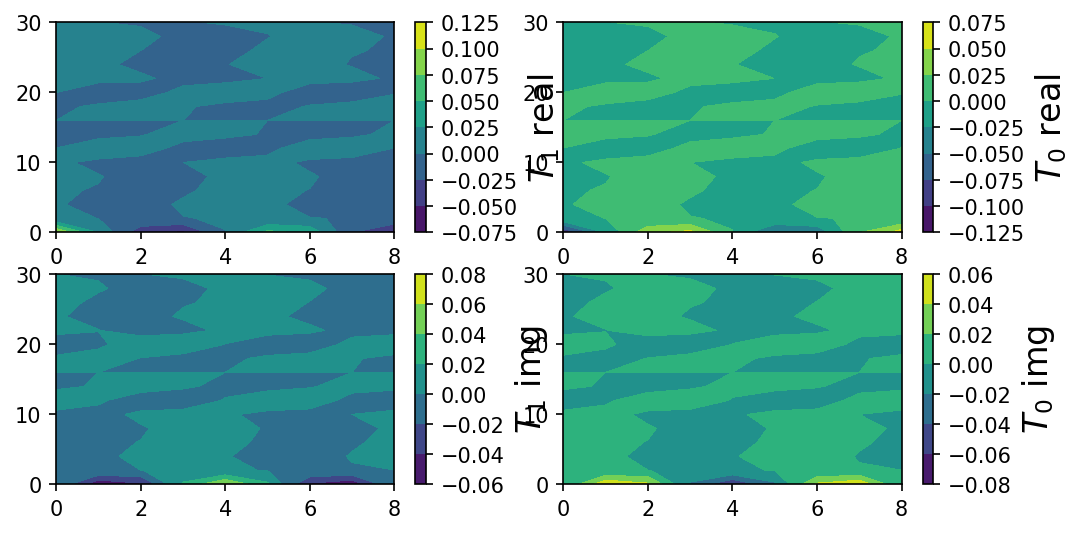

In [167]:
fig, axes = plt.subplots(2, 2, figsize=(8, 4), dpi=150)
axes = axes.flatten()

cs1 = axes[0].contourf(half_kx, fk_y, theta_hat[::2, :, 1].T, )
cbar = fig.colorbar(cs1)
cbar.set_label(r'$T_{1}$ real', size=16)

cs2 = axes[1].contourf(half_kx, fk_y, theta_hat[::2, :, 0].T)
cbar1 = fig.colorbar(cs2)
cbar1.set_label(r'$T_{0}$ real', size=16)

cs3 = axes[2].contourf(half_kx, fk_y, theta_hat[1::2, :, 1].T)
cbar2 = fig.colorbar(cs3)
cbar2.set_label(r'$T_{1}$ img', size=16)

cs4 = axes[3].contourf(half_kx,  fk_y, theta_hat[1::2, :, 0].T)
cbar3 = fig.colorbar(cs4)
cbar3.set_label(r'$T_{0}$ img', size=16)

/tmp/ipykernel_35727/1065625554.py:3: UserWarning: The following kwargs were not used by contour: 'color', 'linewidth'
  cs1 = axes[0].contourf(x_coords, y_coords, theta[:, :, 1], color='black', alpha=0.4, linewidth=1)
/tmp/ipykernel_35727/1065625554.py:7: UserWarning: The following kwargs were not used by contour: 'color', 'linewidth'
  cs2 = axes[1].contourf(x_coords,  y_coords, theta[:, :, 0], color='blue', alpha=0.4, linewidth=1)


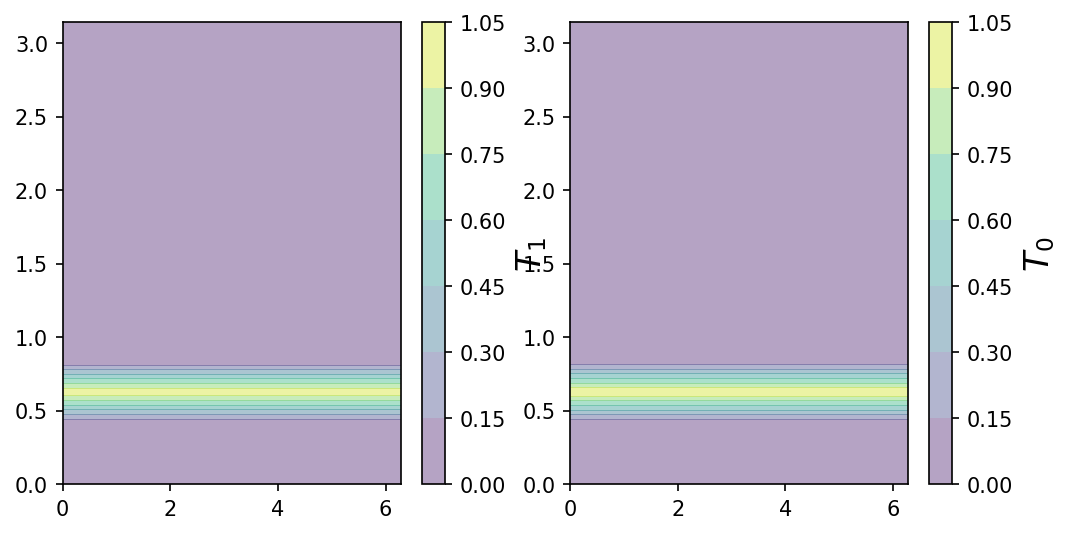

In [168]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4), dpi=150)
axes = axes.flatten()
cs1 = axes[0].contourf(x_coords, y_coords, theta[:, :, 1], color='black', alpha=0.4, linewidth=1)
cbar = fig.colorbar(cs1)
cbar.set_label(r'$T_{1}$', size=16)

cs2 = axes[1].contourf(x_coords,  y_coords, theta[:, :, 0], color='blue', alpha=0.4, linewidth=1)
cbar = fig.colorbar(cs2)
cbar.set_label(r'$T_{0}$', size=16)

In [169]:
# gif_dir = dir + '/../gif'
# if not os.path.exists(gif_dir):
#     os.makedirs(gif_dir)
# filenames = []
# for i in timestep:
#     fig = contourf_t(theta_f, i, domain, dims, z_ind=32)
    
#     # create file name and append it to a list
#     filename = gif_dir + f'/%.5i.png' % i
#     filenames.append(filename)
    
#     # save frame
#     fig.savefig(filename)
#     plt.close()
# # build gif
# with imageio.get_writer(gif_dir + '/mygif.gif', mode='I') as writer:
#     for filename in filenames:
#         image = imageio.imread(filename)
#         writer.append_data(image)
        
# # Remove files
# # for filename in set(filenames):
#     # os.remove(filename)